In [47]:
import random
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from scipy.ndimage import zoom

In [48]:
def generate_noise(resolution, max_val):
    noise = []
    for _ in range(resolution):
        row = [random.uniform(0, max_val) for _ in range(resolution)]
        noise.append(row)
    return noise

In [49]:
low_res = generate_noise(16, 0.25)
med_res = generate_noise(32, 0.25)
high_res = generate_noise(64, 0.5)
very_high_res = generate_noise(128, 1)

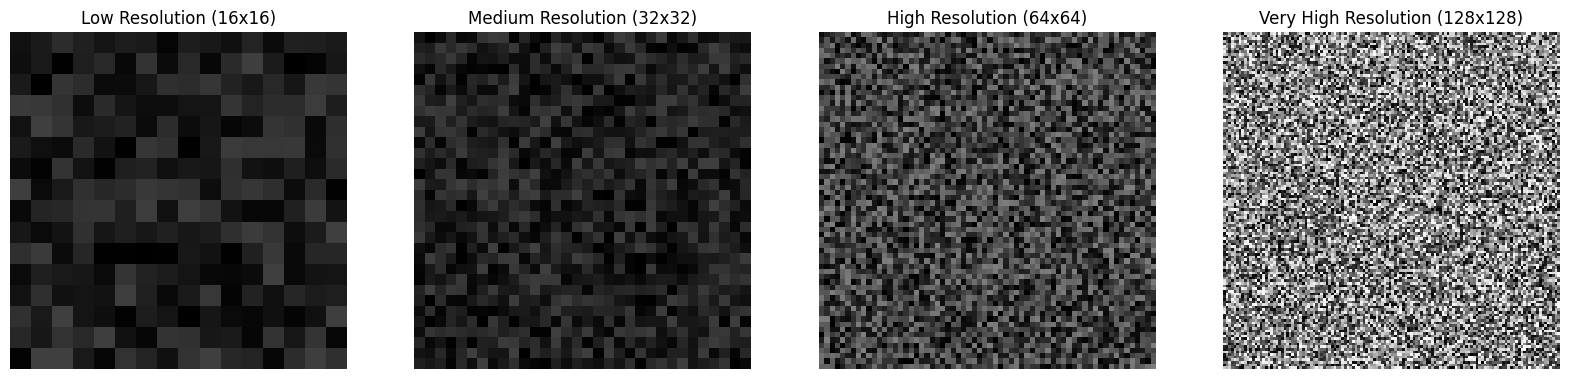

In [50]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot low resolution
axs[0].imshow(low_res, cmap='gray', interpolation='nearest', vmin=0, vmax=1)
axs[0].set_title('Low Resolution (16x16)')

# Plot medium resolution
axs[1].imshow(med_res, cmap='gray', interpolation='nearest', vmin=0, vmax=1)
axs[1].set_title('Medium Resolution (32x32)')

# Plot high resolution
axs[2].imshow(high_res, cmap='gray', interpolation='nearest', vmin=0, vmax=1)
axs[2].set_title('High Resolution (64x64)')

# Plot very high resolution
axs[3].imshow(very_high_res, cmap='gray', interpolation='nearest', vmin=0, vmax=1)
axs[3].set_title('Very High Resolution (128x128)')

# Hide axes
for ax in axs:
    ax.axis('off')

plt.show()

In [51]:
low_res_interpolated = zoom(low_res, (128/16))
med_res_interpolated = zoom(med_res, (128/32))
high_res_interpolated = zoom(high_res, (128/64))

low_weight = 20
med_weight = 6
high_weight = 2
very_high_weight = 1

total_weight = low_weight + med_weight + high_weight + very_high_weight

final = (np.multiply(low_res_interpolated, low_weight)  + np.multiply(med_res_interpolated, med_weight) + np.multiply(high_res_interpolated, high_weight) + np.multiply(very_high_res, very_high_weight)) / total_weight

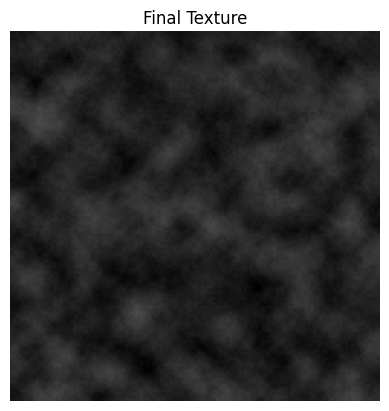

In [52]:
plt.imshow(final, cmap='gray', vmin=0, vmax=1)
plt.title('Final Texture')
plt.axis('off')
plt.show()

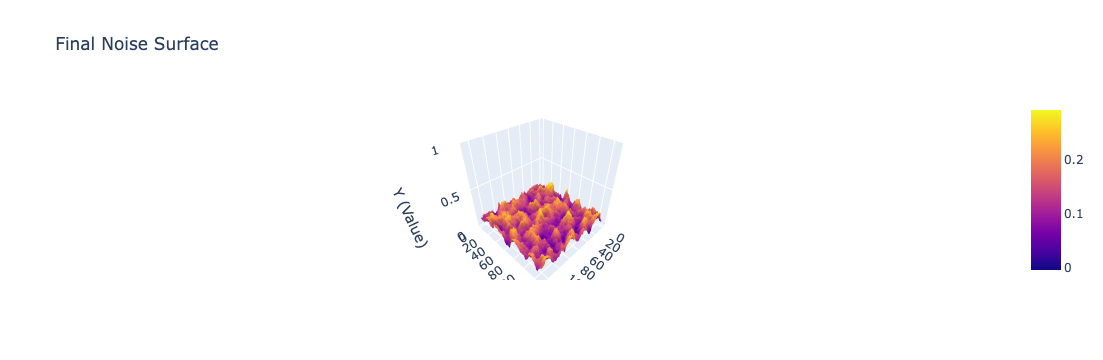

In [53]:
x = np.linspace(0, 127, 128)
y = np.linspace(0, 127, 128)

# Create the 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(x=x, y=y, z=final)])

# Customize layout
fig.update_layout(
    title='Final Noise Surface',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Z',
        zaxis_title='Y (Value)',
        zaxis=dict(range=[0, 1]),
        aspectmode='manual',
        aspectratio=dict(x=1, y=1, z=1)  # Adjust aspect ratio if needed
    )
)

# Show the interactive plot
fig.show()